In [1]:
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import numpy_groupies as npg
import pandas as pd
import scipy.stats as stats
import scipy.special as ss
import sortedcontainers as sc
import os
import tqdm
import pickle

Playing around with V4 acdp

In [2]:
from statsmodels.discrete.discrete_model import NegativeBinomial as statsNB

In [3]:
os.environ["CAPY_REF_FA"] = "/home/opriebe/data/ref/hg19/Homo_sapiens_assembly19.fasta"
import hapaseg.coverage_MCMC as mcmc_cov
import hapaseg.NB_coverage_MCMC as nb_cov
from capy import mut, seq

Cannot find path to gnomAD index; gnomAD functionality disabled.


In [4]:
import hapaseg.coverage_DP as dp_cov
import hapaseg.a_cov_DP as dp_a_cov

In [5]:
colors = mpl.cm.get_cmap("tab20").colors

In [6]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 30

In [7]:
multidraw_df = pd.read_pickle('exome_results/acdp_df.pickle')

In [8]:
mcmc_data = np.load('exome_results/coverage_mcmc_clusters/cov_mcmc_collected_data.npz')
beta = mcmc_data['beta']

In [154]:
allelic_segs = pd.read_pickle("exome/6_C1D1_META.allelic_segs.auto_ref_correct.overdispersion92.no_phase_correct.pickle")
chrbdy = allelic_segs.dropna().loc[:, ["start", "end"]]
chr_ends = chrbdy.loc[chrbdy["start"] != 0, "end"].cumsum()

In [9]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [156]:
singledraw = multidraw_df.loc[multidraw_df.dp_draw == 0]

In [157]:
a_cov_dp = dp_a_cov.Run_Cov_DP(singledraw, beta, coverage_prior=False)

In [158]:
a_cov_dp.run(1)

n unassigned: 139
n unassigned: 55
n unassigned: 21
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin


([array([  0, 109,  78,   1,  65, 111,  -1,  -1,  42,  92,  40, 104,  34,
         110,   2,  61,  54,  52,  90, 113, 138, 100,  87,  76,  44,  74,
          25,  30,  38,  26, 125,  47,  11, 114,  25, 137,  33,  89,  43,
          45,   7,  69,  23,  13,  42,  71,  20,  49,   9,  24,   3, 123,
         127,  32, 127,  34,  34,  71,  55,  41,   0,  62,  77,  68,  18,
         104,  11, 104, 130,  80,  53,  36,  27,  46, 141,  34,  40,  72,
         103,   8,   5,  17, 131,   3,  83, 108,  66,  57,  40, 119,  70,
         117,  22,  82,  21,  94,  93,  10,  72,  16,  31,   9,  63,  51,
           6, 102, 136,   9,  39,  95,  59, 119,  81,  79,  77,  37,  55,
          95, 139,  28,  61, 123,  67,  72,  55,   2,  48,   7,  77,  97,
         130, 107,  58,   4,  34, 137, 105,  85,  61,  16, 125,  35])],
 SortedDict({0: 3, 1: 1, 2: 2, 3: 2, 4: 1, 5: 1, 6: 1, 7: 2, 8: 1, 9: 3, 10: 1, 11: 2, 13: 1, 16: 2, 17: 1, 18: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 2, 26: 1, 27: 1, 28: 1, 30: 1, 31:

In [159]:
len(a_cov_dp.cluster_dict)

106

In [161]:
a_cov_dp.segment_V_list[0]

0.1416449625198723

In [39]:
np.array(a_cov_dp.segment_r_list[0]).var() * 5

0.6283616425873462

In [40]:
len(a_cov_dp.segment_r_list[0])

85

In [43]:
vals[0]

array([104.515093  , 104.71147571, 106.30601199, 104.7068314 ,
       103.76643392, 106.16155263, 104.78927729, 105.19919141,
       104.79824044, 104.58018004, 105.80032973, 104.57668792,
       106.12360211, 103.62436419, 103.28915861, 105.25661663,
       104.36098384, 105.54702944, 105.73267905, 105.56357023,
       103.11848359, 105.08018328, 105.69811353, 105.96800258,
       104.76792143, 104.97881339, 105.16719453, 105.39784256,
       104.98012977, 105.27689746, 105.73905732, 104.71314013,
       105.57258511, 105.52403354, 103.99688205, 104.27720195,
       105.27871914, 103.22725682, 105.06594133, 105.30919616,
       103.50209873, 104.54414524, 104.71047097, 104.7522058 ,
       106.45982907])

In [58]:
a_cov_dp.cluster_dict

SortedDict({0: SortedSet([0, 60, 70]), 1: SortedSet([21]), 2: SortedSet([45, 57]), 3: SortedSet([29]), 4: SortedSet([26, 34]), 6: SortedSet([23]), 7: SortedSet([69]), 8: SortedSet([95]), 9: SortedSet([20, 118]), 10: SortedSet([74, 77, 91, 98, 123]), 11: SortedSet([92, 100, 106]), 12: SortedSet([99, 139]), 13: SortedSet([40, 124, 127]), 14: SortedSet([22]), 15: SortedSet([25, 109, 117]), 16: SortedSet([10, 76, 88]), 17: SortedSet([68, 102, 130]), 18: SortedSet([8, 42, 44]), 19: SortedSet([86, 138]), 20: SortedSet([24]), 21: SortedSet([39, 85]), 22: SortedSet([4, 32, 66]), 23: SortedSet([89]), 24: SortedSet([62, 114, 128, 140]), 25: SortedSet([50, 83]), 26: SortedSet([11, 51, 65, 67, 121, 133]), 27: SortedSet([17, 54]), 28: SortedSet([71]), 29: SortedSet([35, 135]), 30: SortedSet([3]), 31: SortedSet([112]), 34: SortedSet([79]), 35: SortedSet([59]), 36: SortedSet([18, 136]), 37: SortedSet([49, 131]), 38: SortedSet([12, 56, 82]), 39: SortedSet([53, 55]), 40: SortedSet([84]), 41: SortedSet(

In [162]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))

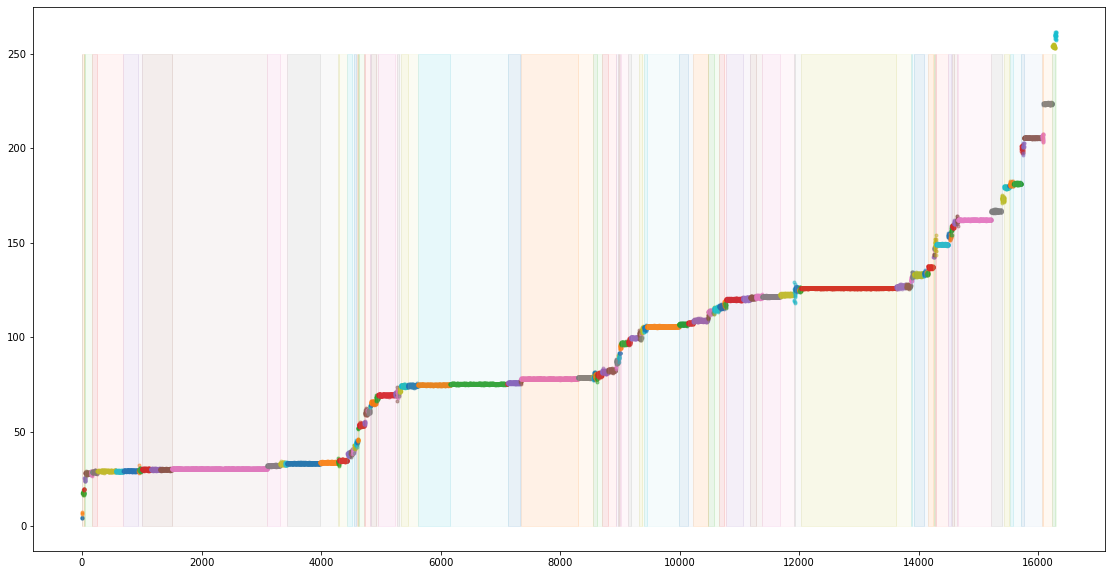

In [163]:
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.r_[counter:counter+len(arr)], arr, marker = '.', alpha=0.5)
        counter+= len(arr)
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    cc+=1

(65.0, 85.0)

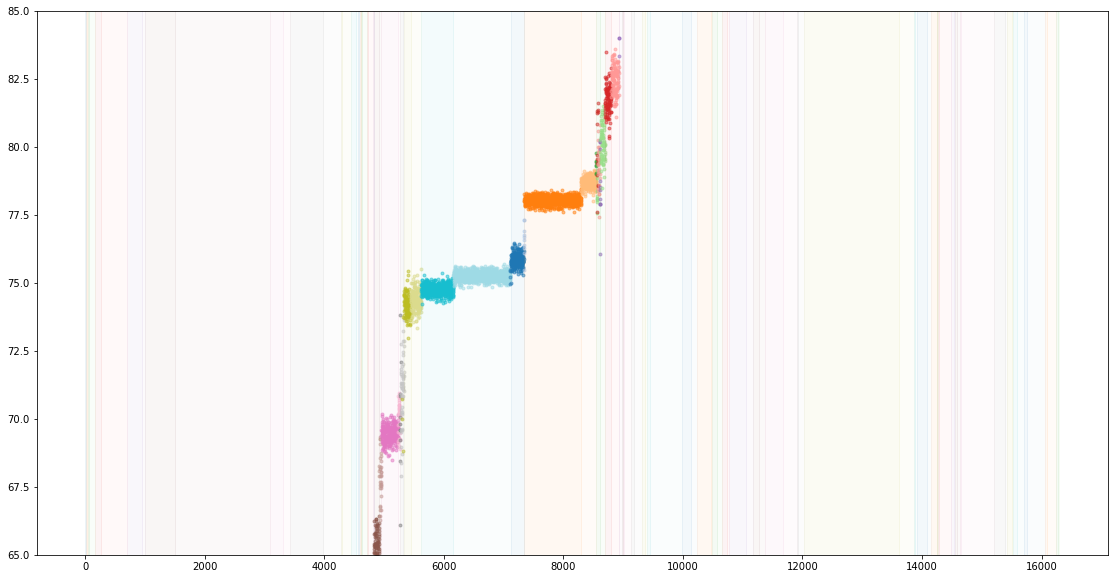

In [164]:
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for i, arr in enumerate(vals):
        ax.scatter(np.r_[counter:counter+len(arr)], arr, color = colors[(cc + i) % len(colors)], marker = '.', alpha=0.5)
        counter+= len(arr)
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.05, color = colors[cc % len(colors)]))
    cc+=1
plt.ylim([65,85])

(25.0, 40.0)

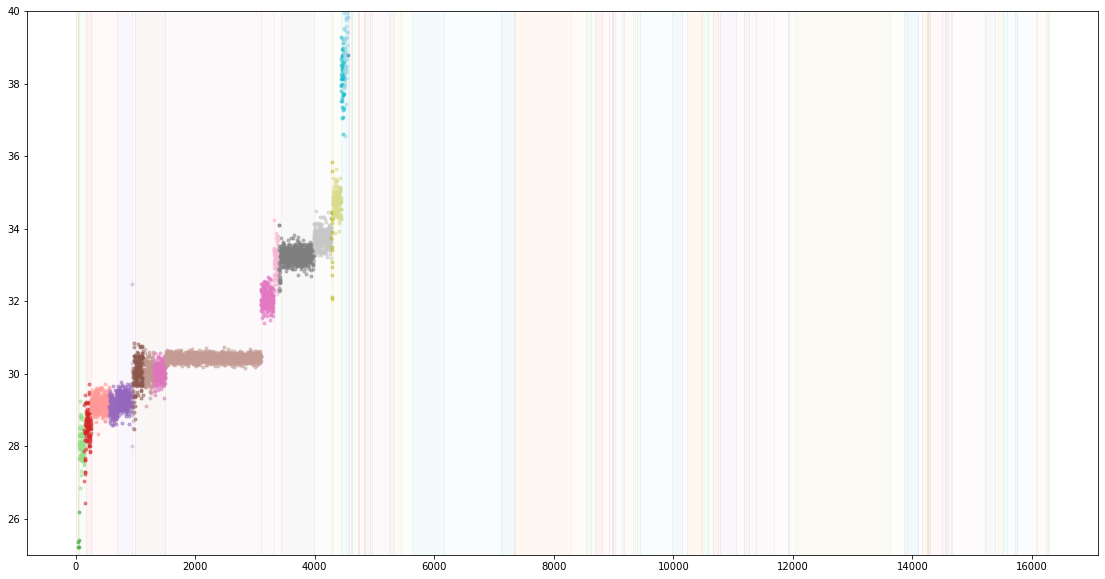

In [165]:
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for i, arr in enumerate(vals):
        ax.scatter(np.r_[counter:counter+len(arr)], arr, color = colors[(cc + i) % len(colors)], marker = '.', alpha=0.5)
        counter+= len(arr)
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.05, color = colors[cc % len(colors)]))
    cc+=1
plt.ylim([25,40])

In [76]:
a = a_cov_dp.cluster_dict[24]
b = a_cov_dp.cluster_dict[84]

In [78]:
a.union(b)

SortedSet([28, 62, 114, 128, 140])

In [79]:
a_cov_dp._ML_cluster(a.union(b))

-2.0180277907106756

In [80]:
a_cov_dp._ML_cluster(a) + a_cov_dp._ML_cluster(b)

1028.5031743626123

In [82]:
def get_rs(self, seg_list):
    r_list = []
    for seg in seg_list:
        r_list.append(self.segment_r_list[seg])
    return np.hstack(r_list)

In [89]:
get_rs(a_cov_dp, a).var()

0.0898495395724476

In [90]:
get_rs(a_cov_dp, b).var()

0.007487960641799719

In [72]:

np.array(a_cov_dp.segment_r_list[24]).mean()

17.478063763249455

In [73]:
np.array(a_cov_dp.segment_r_list[84]).mean()

69.47305562984808

In [ ]:
a_cov_dp.ML_normalgamma(r, r.mean(), 1e-4, alpha, beta)

In [268]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [269]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True)

In [270]:
a_cov_dp.run(1)

n unassigned: 1226
n unassigned: 1117
n unassigned: 1001
n unassigned: 884
n unassigned: 804
n unassigned: 723
n unassigned: 661
n unassigned: 603
n unassigned: 534
n unassigned: 479
n unassigned: 434
n unassigned: 394
n unassigned: 352
n unassigned: 310
n unassigned: 276
n unassigned: 240
n unassigned: 218
n unassigned: 194
n unassigned: 169
n unassigned: 118
n unassigned: 62
n unassigned: 14
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0


([array([25, 25, 25, ..., -1, -1, -1])],
 SortedDict({1: 78550, 13: 865, 25: 42892, 34: 30790, 82: 3240, 3070: 72, 3077: 10, 3093: 65, 3099: 53, 3100: 69, 3101: 69, 3102: 88, 3103: 30, 3104: 51, 3105: 61}))

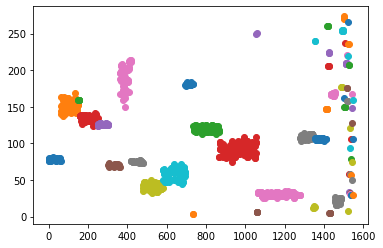

In [170]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

In [151]:
a_cov_dp.ML_total_history[-1]

-212793.33909013914

In [171]:
a_cov_dp.ML_total_history[-1]

-256290.8588974456

In [152]:
def _scatter_apply(x, minor, major):
    f = np.zeros(len(x))
    f[x.allele == -1] = minor / (minor + major)
    f[x.allele == 1] = major / (minor + major)
    locs = x.start_g.values + (x.end_g.values - x.start_g.values)/2
    return locs, f

In [153]:
ADP_dict = {}
for ADP, group in a_cov_dp.cov_df.loc[a_cov_dp.cov_df.dp_draw == 0].groupby('allelic_cluster'):
    ADP_dict[ADP] = (group['maj_count'].sum(), group['min_count'].sum())

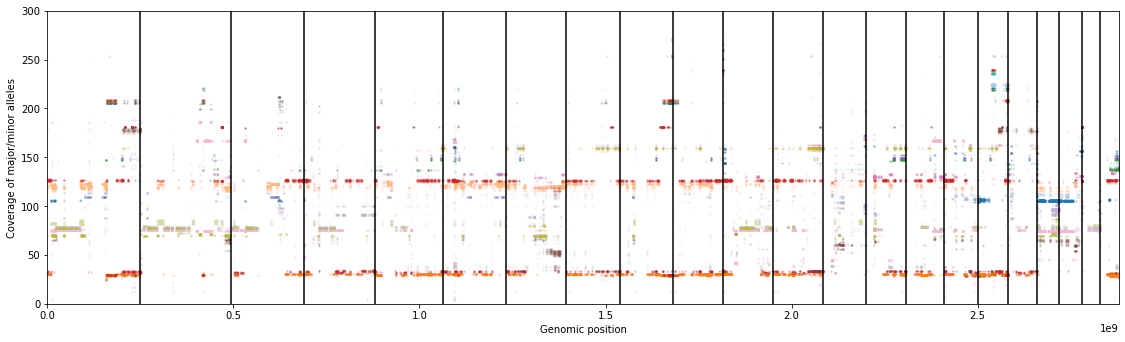

In [155]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

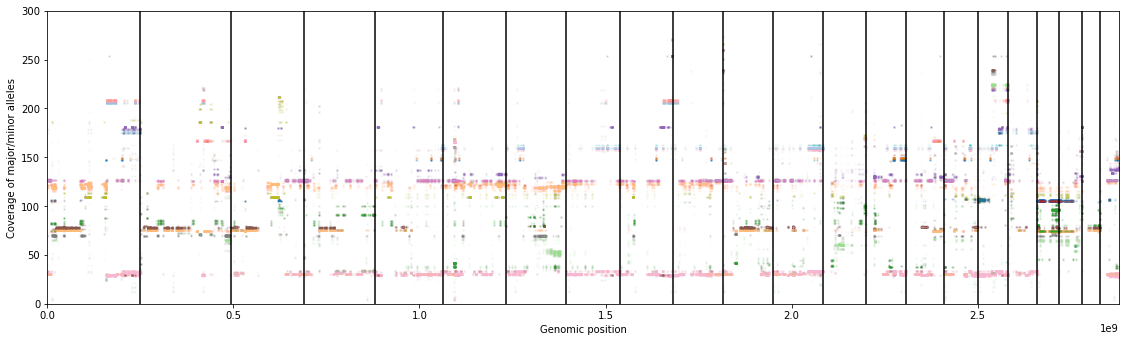

In [172]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

testing warm start

In [216]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [217]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True)

In [218]:
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassi

([array([1324,  832,  832, ..., 1569, 1569, 1569])],
 SortedDict({16: 4083, 34: 4668, 231: 2514, 300: 4995, 570: 13875, 639: 25957, 647: 17476, 721: 6168, 770: 612, 772: 410, 773: 400, 777: 367, 778: 309, 832: 45182, 843: 4176, 858: 103, 861: 57, 1017: 3708, 1095: 3504, 1162: 428, 1179: 42935, 1324: 4903, 1569: 369, 1587: 89, 2874: 27, 2916: 553, 4066: 10, 6439: 13, 6812: 15, 6872: 14, 6920: 1009, 7281: 54, 7631: 162, 7822: 18, 7847: 45, 7849: 21, 7873: 4, 7874: 15, 7878: 454, 7882: 90, 7883: 82, 7884: 31, 7886: 225, 7887: 20, 7888: 190, 7889: 7, 7890: 20, 7891: 18, 7892: 33, 7893: 8, 7894: 42, 7895: 10, 7897: 7, 7898: 88, 7899: 43, 7900: 11, 7901: 91, 7902: 25}))

In [219]:
len(a_cov_dp.cluster_dict)

58

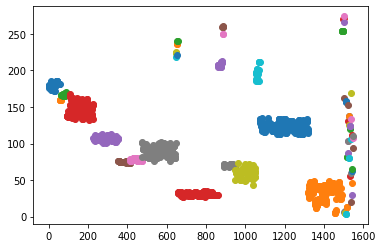

In [220]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

In [228]:
np.median(np.array(a_cov_dp.segment_V_list))

0.2669257910094591

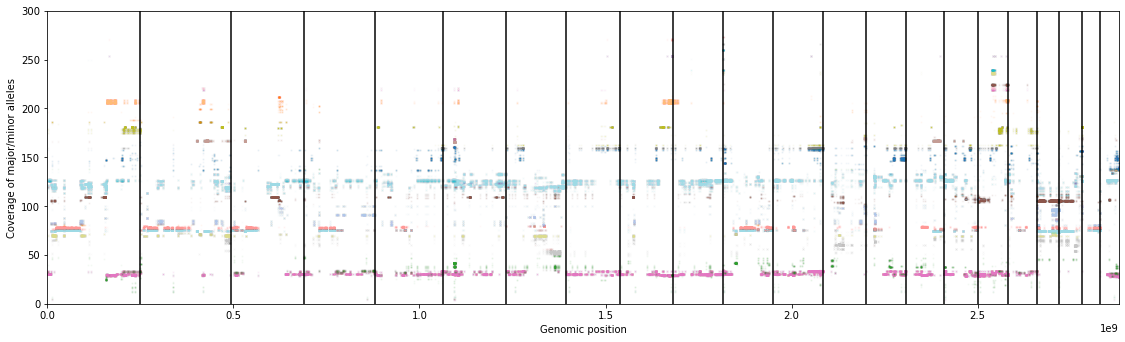

In [221]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

**fixed the squared varaince in the mu posterior**

In [292]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [293]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True)

In [294]:
len(a_cov_dp.greylist_segments)

430

In [295]:
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0


([array([355, 355, 355, ...,  -1,  -1,  -1])],
 SortedDict({33: 15628, 355: 51091, 364: 33885, 569: 12956, 637: 45887, 771: 1021, 846: 3618, 2160: 43, 2376: 963, 2438: 94, 2981: 115, 2987: 8, 2988: 7, 2989: 39, 2992: 30, 2994: 19, 2995: 225}))

In [296]:
len(a_cov_dp.cluster_dict)

17

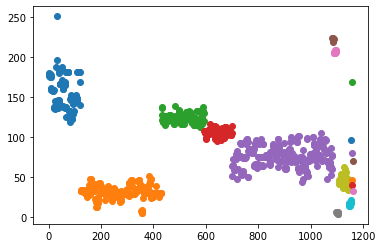

In [297]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

Text(0.5, 0, 'ln var')

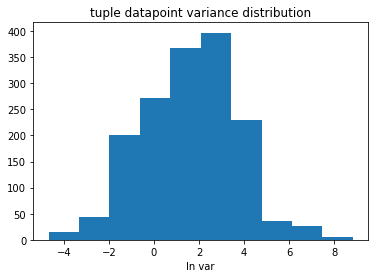

In [303]:
_ = plt.hist(np.log(np.array(a_cov_dp.segment_V_list)))
plt.title('tuple datapoint variance distribution')
plt.xlabel('ln var')

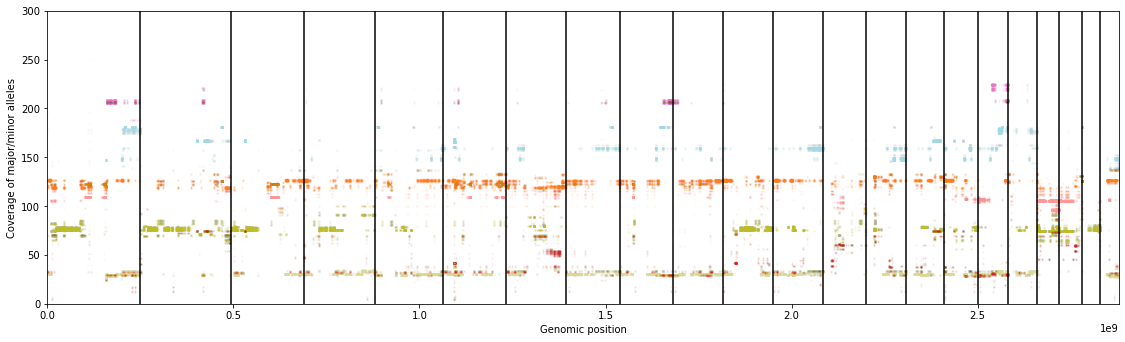

In [ ]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

alpha = 0.5

In [375]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [376]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True)

In [377]:
len(a_cov_dp.greylist_segments)

427

In [378]:
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0


([array([ 834,  834, 2563, ...,   -1,   -1,   -1])],
 SortedDict({35: 15666, 366: 30922, 571: 16208, 636: 43859, 772: 1070, 834: 41760, 845: 3602, 2161: 70, 2563: 6487, 3948: 22, 3975: 166, 3983: 10, 3985: 4, 3993: 176, 4011: 234, 4012: 215, 4014: 83, 4015: 265, 4017: 8, 4018: 39, 4020: 69}))

In [382]:
len(a_cov_dp.cluster_dict)

21

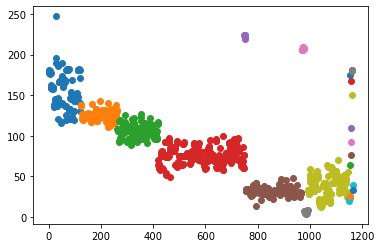

In [383]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

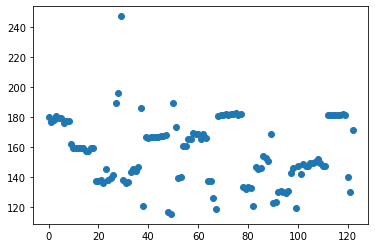

In [385]:
counter=0
for c in [35]:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

In [388]:
plt.sup
for c in a_cov_dp.cluster_dict:
    print(c, np.median(np.array([np.array(a_cov_dp.segment_r_list[seg]).var() for seg in a_cov_dp.cluster_dict[c]])))

35 5.820063317943685
366 4.340468885381826
571 3.8880235035140425
636 3.053902026689147
772 12.729884096605025
834 0.4455615564569927
845 4.116600915210844
2161 0.11321667923730008
2563 1.6096353977046824
3948 2.3091512580609668
3975 4.952992118072366
3983 3.4163835908752183
3985 0.03549352554214957
3993 4.335872175053935
4011 1.8404927986008528
4012 1.1267718242620788
4014 3.089914890820717
4015 8.722688453833374
4017 0.21794264469635072
4018 2.292213945984463
4020 0.44633984987420816


In [389]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))

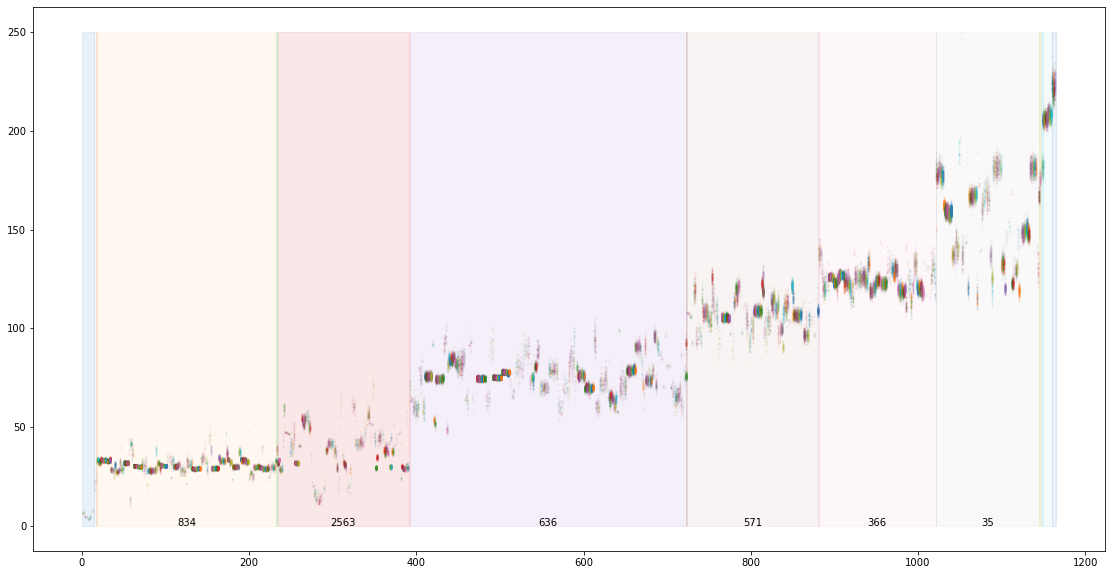

In [449]:
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    if a_cov_dp.cluster_counts[c]> 5000:
        ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

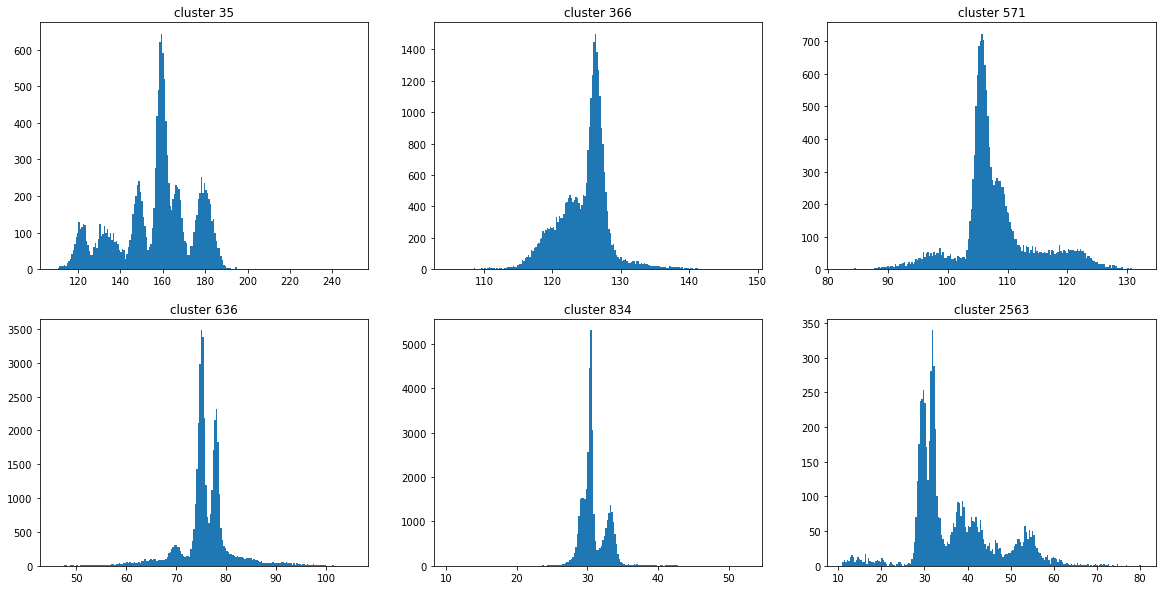

In [453]:
f, axs = plt.subplots(2,3, figsize=(20, 10))
ax_lst = axs.flatten()
big_clusts = [c for c in a_cov_dp.cluster_dict if a_cov_dp.cluster_counts[c] > 5000]
for i, c in enumerate(big_clusts):
    ax_lst[i].hist(np.hstack([a_cov_dp.segment_r_list[seg] for seg in a_cov_dp.cluster_dict[c]]), bins = 200)
    ax_lst[i].set_title('cluster {}'.format(c))

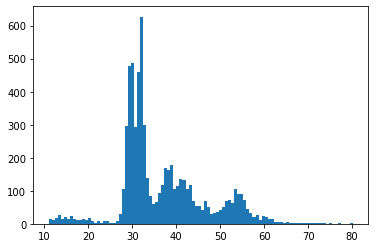

In [416]:
_ =plt.hist(np.hstack([a_cov_dp.segment_r_list[seg] for seg in a_cov_dp.cluster_dict[2563]]), bins=100)

In [430]:
segID=290
self=a_cov_dp
clustID = self.cluster_assignments[segID]
# print('seg_pick:', segID, clustID)
# compute ML of AB = Cs (cached)
if clustID == -1:
    ML_AB = 0
else:
    ML_AB = self.cluster_MLs[clustID]

# compute ML of A = Cs - S
if clustID == -1:
    ML_A = 0
# if cluster is empty without S ML is also 0
elif len(self.cluster_dict[clustID]) == 1:
    ML_A = 0
else:
    ML_A = self._ML_cluster(self.cluster_dict[clustID].difference([segID]))

# compute ML of S on its own
ML_S = self._ML_cluster([segID])

# compute ML of every other cluster C = Ck, k != s (cached)
# for now were also allowing it to chose to stay in current cluster

ML_C = np.array([ML for (ID, ML) in self.cluster_MLs.items()])

# compute ML of every cluster if S joins
ML_BC = np.array([self._ML_cluster(self.cluster_dict[k].union([segID]))
                  for k in self.cluster_counts.keys()])
# likelihood ratios of S joining each other cluster S -> Ck
ML_rat_BC = ML_A + ML_BC - (ML_AB + ML_C)

# if cluster is unassigned we set the ML ratio to 1 for staying in its own cluster
# print(ML_rat_BC)
if clustID > -1:
    ML_rat_BC[list(self.cluster_counts.keys()).index(clustID)] = 0

# compute ML of S starting a new cluster
ML_new = ML_A + ML_S - ML_AB

prior_diff=[]
clust_prior_p = 1
ML_rat = np.r_[ML_rat_BC, ML_new]
count_prior = np.r_[
                    [count_prior[self.prior_clusters.index(x)] for x in
                     prior_diff], self.cluster_counts.values(), self.segment_counts[segID] * self.alpha]
count_prior /= count_prior.sum()
MLs_max = ML_rat.max()
choice_p = np.exp(ML_rat - MLs_max + np.log(count_prior) + np.log(clust_prior_p)) / np.exp(
                    ML_rat - MLs_max + np.log(count_prior) + np.log(clust_prior_p)).sum()

In [432]:
count_prior

array([9.73366926e-02, 1.92125955e-01, 1.00704271e-01, 2.72506703e-01,
       6.64817191e-03, 2.59465102e-01, 2.23801077e-02, 4.34927134e-04,
       4.03053188e-02, 1.36691385e-04, 1.03139863e-03, 6.21324477e-05,
       2.48529791e-05, 1.09353108e-03, 1.45389928e-03, 1.33584763e-03,
       5.15699316e-04, 1.64650987e-03, 4.97059582e-05, 2.42316546e-04,
       4.28713889e-04, 7.14523149e-05])

In [431]:
choice_p

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.97417411e-034,
       1.77278635e-044, 1.55975444e-021, 2.96861116e-268, 4.60020306e-023,
       5.20664828e-038, 1.33063975e-280, 0.00000000e+000, 9.35343862e-297,
       1.69185672e-140, 0.00000000e+000, 2.02686287e-059, 5.00007212e-061,
       3.56944982e-099, 1.00000000e+000])

In [ ]:
sorted([(np.array(a_cov_dp.segment_r_list[seg]).mean(), np.sqrt(np.array(a_cov_dp.segment_r_list[seg]).var()), seg) for seg in a_cov_dp.cluster_dict[2563]])

[(12.336227883519193, 0.9421720357197966, 290),
 (13.055232146224009, 0.9866046254125751, 291),
 (13.652827853767821, 1.5473905983471086, 288),
 (13.756631082049118, 1.1949772132295133, 287),
 (14.163859744305498, 1.276656205594983, 293),
 (14.341005228184901, 1.3327023960119446, 292),
 (16.248294370864727, 0.1872604015885009, 304),
 (16.428951718357286, 0.12325449044331911, 282),
 (16.917947273262993, 1.8464933442321871, 284),
 (17.053274940458433, 0.19368708823515074, 810),
 (17.10894343726405, 1.785354563078837, 286),
 (17.162448140144495, 1.278645157043708, 289),
 (17.303237680717906, 3.8609824137305866, 308),
 (18.835167853878517, 1.2523858092128881, 314),
 (18.90966472640389, 1.5361369703147705, 797),
 (19.210959584521323, 1.0337838961314887, 310),
 (19.388429222710553, 2.1177989630677287, 444),
 (20.04136983901133, 0.5663125906520902, 798),
 (20.370244817623515, 0.1752101298469126, 280),
 (20.76126798130047, 1.0231645487271248, 799),
 (22.23264414312186, 0.0837657590640631, 278)

In [400]:
sorted(rs)

[(5.614932550792254, 2161),
 (21.725760614329015, 3948),
 (25.48106719135982, 3983),
 (31.128106363110877, 834),
 (33.092589290375955, 4020),
 (38.76501221971287, 4018),
 (38.87884458118783, 2563),
 (63.3878130028812, 3985),
 (75.49284276315349, 636),
 (75.84895111905047, 4012),
 (92.57760556777386, 4014),
 (105.87463217595044, 571),
 (108.9397837866615, 4011),
 (125.10711834823971, 366),
 (149.85103921646004, 4017),
 (156.8871612397648, 35),
 (166.923476032435, 3993),
 (175.39372697066025, 3975),
 (180.9674268368433, 4015),
 (207.14822154874906, 845),
 (222.5620113998206, 772)]

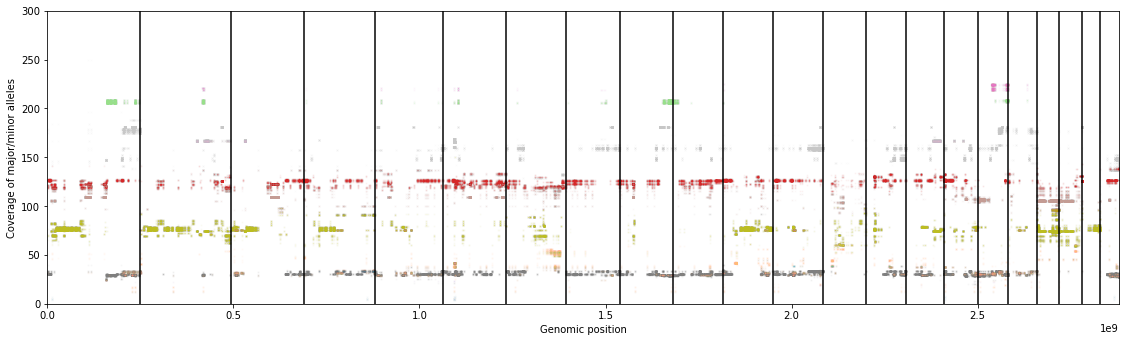

In [381]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

alpha=0.8

In [348]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [455]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=False)

In [456]:
len(a_cov_dp.greylist_segments)

434

In [457]:
a_cov_dp.run(1)

n unassigned: 1157
n unassigned: 1041
n unassigned: 937
n unassigned: 848
n unassigned: 763
n unassigned: 677
n unassigned: 605
n unassigned: 549
n unassigned: 486
n unassigned: 426
n unassigned: 381
n unassigned: 340
n unassigned: 304
n unassigned: 281
n unassigned: 255
n unassigned: 226
n unassigned: 199
n unassigned: 183
n unassigned: 164
n unassigned: 117
n unassigned: 45
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0


([array([ 5,  5,  5, ..., -1, -1, -1])],
 SortedDict({1: 47203, 5: 41318, 18: 11656, 27: 30868, 31: 17182, 182: 3240, 199: 865, 1913: 2749, 2975: 7, 3217: 6, 3264: 43, 3271: 34, 3272: 75, 3273: 41}))

In [458]:
len(a_cov_dp.cluster_dict)

14

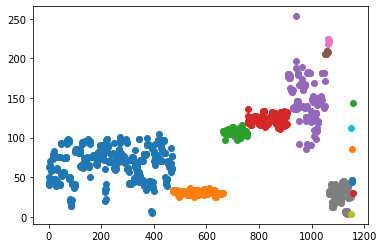

In [459]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

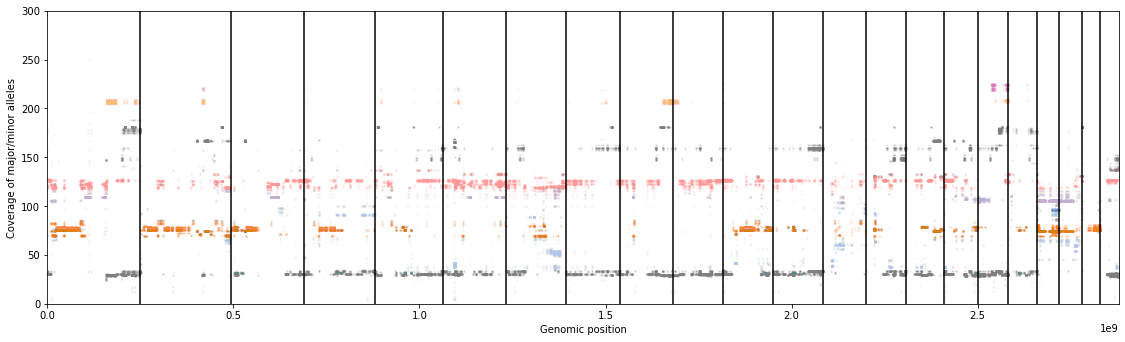

In [345]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

In [465]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [466]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=False)

In [467]:
a_cov_dp.run(1)

n unassigned: 1161
n unassigned: 1039
n unassigned: 943
n unassigned: 841
n unassigned: 759
n unassigned: 683
n unassigned: 606
n unassigned: 543
n unassigned: 500
n unassigned: 453
n unassigned: 396
n unassigned: 356
n unassigned: 318
n unassigned: 288
n unassigned: 263
n unassigned: 242
n unassigned: 208
n unassigned: 187
n unassigned: 166
n unassigned: 101
n unassigned: 27
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0


([array([  19, 1011, 1011, ...,   -1,   -1,   -1])],
 SortedDict({9: 42738, 12: 865, 18: 47241, 19: 38003, 25: 3240, 55: 13659, 416: 3, 1011: 8932, 1995: 37, 2958: 27, 2976: 11, 2982: 33, 2985: 98, 2987: 239, 2988: 176, 2989: 7, 2990: 69, 2992: 43}))

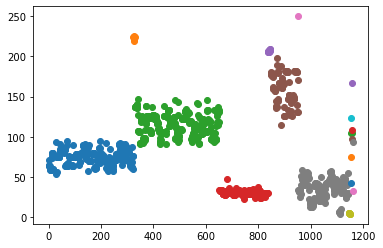

In [468]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

In [472]:
len(a_cov_dp.cdict_history)

83

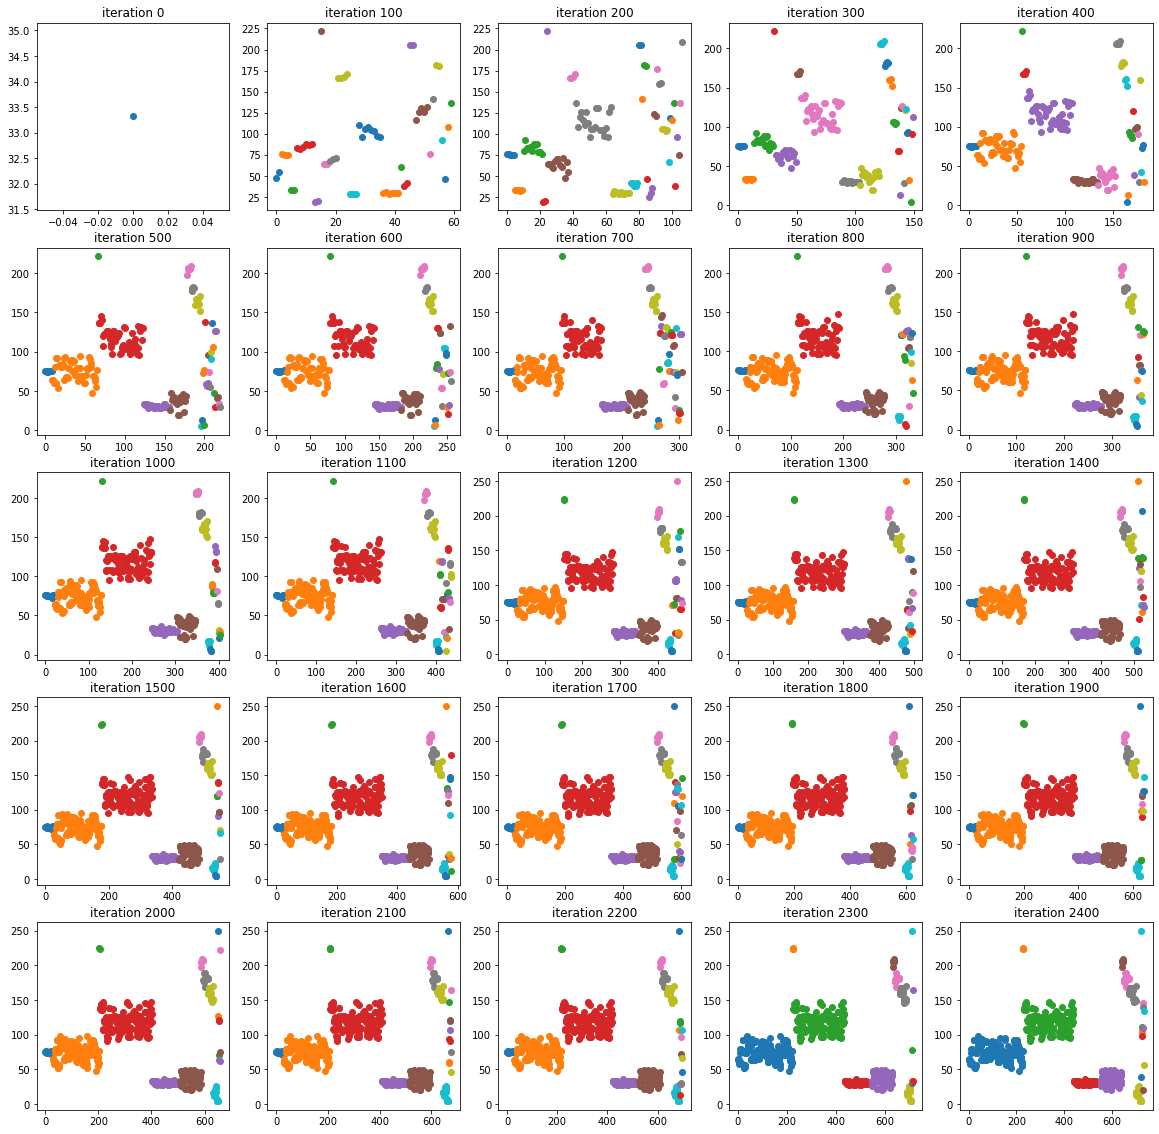

In [476]:
f, axs = plt.subplots(5,5,figsize=(20,20))
ax_lst = axs.flatten()
for i in range(25):
    counter=0
    for c in a_cov_dp.cdict_history[i]:
        vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cdict_history[i][c]]
        ax_lst[i].scatter(np.r_[counter:counter+len(vals)], vals)
        counter+= len(vals)
    ax_lst[i].set_title('iteration {}'.format(i*100))

In [480]:
a_cov_dp.cdict_history[1]

SortedDict({2: SortedSet([1444, 1534]), 4: SortedSet([186, 637, 644]), 8: SortedSet([0, 20]), 9: SortedSet([466, 471, 491, 678, 882, 884]), 11: SortedSet([796, 797]), 12: SortedSet([773]), 13: SortedSet([104, 106]), 14: SortedSet([541, 909, 1158]), 15: SortedSet([231, 234, 237, 1533]), 16: SortedSet([80, 405, 785]), 18: SortedSet([510, 870, 889, 954, 1059, 1062, 1139, 1418]), 19: SortedSet([359, 767, 829, 1189, 1464, 1568]), 23: SortedSet([118]), 24: SortedSet([345, 1066]), 25: SortedSet([838, 841]), 26: SortedSet([498, 577, 974, 1433, 1439]), 28: SortedSet([180]), 29: SortedSet([69]), 32: SortedSet([1497, 1503]), 35: SortedSet([196]), 36: SortedSet([141]), 37: SortedSet([145]), 38: SortedSet([63])})

In [619]:
#15
[np.array(a_cov_dp.segment_r_list[seg]).mean() for seg in a_cov_dp.cdict_history[1][26]]

[116.81830674732221,
 126.20757905571745,
 130.87708926825678,
 126.35001694195996,
 131.37250973407546]

In [620]:
#10
[np.array(a_cov_dp.segment_r_list[seg]).mean() for seg in a_cov_dp.cdict_history[1][18]]

[107.70816578848581,
 92.55014485689307,
 110.06529610428373,
 96.73793952836282,
 105.21228891640523,
 108.66548635978529,
 104.19700601595241,
 102.92451480673571,
 97.42445686768247,
 95.75210835970961]

In [571]:
#4
[np.array(a_cov_dp.segment_r_list[seg]).mean() for seg in a_cov_dp.cdict_history[1][35]]

[92.55014485689307]

In [502]:
np.array([sum([len(a_cov_dp.segment_r_list[seg]) for seg in a_cov_dp.cdict_history[1][c]]) for c in a_cov_dp.cdict_history[1]])

array([  15, 1951,  638,  473,   14,  200,    8,   63,  548,  129,  422,
       1926,   45,   56,  559,  150,  215,   84,  258,    8,    8,    8,
         44])

In [614]:
a_cov_dp.cdict_history[1]

SortedDict({2: SortedSet([1444, 1534]), 4: SortedSet([186, 637, 644]), 8: SortedSet([0, 20]), 9: SortedSet([466, 471, 491, 678, 882, 884]), 11: SortedSet([796, 797]), 12: SortedSet([773]), 13: SortedSet([104, 106]), 14: SortedSet([541, 909, 1158]), 15: SortedSet([231, 234, 237, 1533]), 16: SortedSet([80, 405, 785]), 18: SortedSet([145, 196, 510, 870, 889, 954, 1059, 1062, 1139, 1418]), 19: SortedSet([359, 767, 829, 1189, 1464, 1568]), 23: SortedSet([118]), 24: SortedSet([345, 1066]), 25: SortedSet([838, 841]), 26: SortedSet([498, 577, 974, 1433, 1439]), 28: SortedSet([180]), 29: SortedSet([69]), 32: SortedSet([1497, 1503]), 35: SortedSet([196]), 36: SortedSet([141]), 37: SortedSet([145]), 38: SortedSet([63])})

In [615]:
snapshot1 = a_cov_dp.cdict_history[1].copy()

In [616]:
snapshot1[18].add(145)
snapshot1[18].add(196)
del snapshot1[37]
del snapshot1[35]

In [679]:
def _ML_cluster(self, cluster_set):
    r_lst = []
    V_lst = []
    for s in cluster_set:
        r_seg = self.segment_r_list[s]
        r_lst.append(r_seg)
        V_lst.append(self.segment_V_list[s])
    r = np.hstack(r_lst)
    V = np.hstack(V_lst)
    V_scale = (V * self.segment_cov_bins[cluster_set] / self.segment_cov_bins[cluster_set].sum()).sum()
    alpha = 0.001
    beta = alpha/2 * V_scale
    return self.ML_normalgamma(r, r.mean(), 1e-4, alpha, beta)

In [680]:
def DP_merge_prior(self, cdict, cur_cluster):
    cur_index = cdict.index(cur_cluster)
    cluster_vals = np.array([sum([len(self.segment_r_list[seg]) for seg in cdict[c]]) for c in cdict])
    N = cluster_vals.sum()
    M = cluster_vals[cur_index]
    prior_results = np.zeros(len(cluster_vals))
    for i, nc in enumerate(cluster_vals):
        if i != cur_index:
            prior_results[i] = ss.loggamma(M + nc) + ss.loggamma(N + self.alpha - M) - (ss.loggamma(nc) + ss.loggamma(N + self.alpha))
        else:
            prior_results[i] = ss.gammaln(M) + np.log(self.alpha) + ss.gammaln(N + self.alpha - M) - ss.gammaln(N + self.alpha)
    return prior_results

In [681]:
self._ML_cluster(cdict[clust_pick])

-1320.3461546955282

In [682]:
_ML_cluster(self, cdict[clust_pick])

-1325.124820164676

In [683]:
self.alpha=0.5

In [684]:
self=a_cov_dp
clust_pick = 18
cdict = snapshot1
clust_pick_segs = np.r_[cdict[clust_pick]].astype(int)
# get ML of this cluster merged with each of the other existing clusters
ML_join = [
    _ML_cluster(self, cdict[i].union(clust_pick_segs)) if i != clust_pick else
    _ML_cluster(self, cdict[i]) for i in cdict]
# we need to compare this ML with the ML of leaving the target cluster and the picked cluster on their own
ML_split = np.array([_ML_cluster(self, cdict[i]) for i in cdict]) + _ML_cluster(self, cdict[clust_pick]) 
ML_split[cdict.keys().index(clust_pick)] = _ML_cluster(self, cdict[clust_pick])
ML_rat = np.array(ML_join) - ML_split

count_prior = DP_merge_prior(a_cov_dp, cdict, 18)

MLs_max = (ML_rat + count_prior).max()
choice_p = np.exp(ML_rat + count_prior - MLs_max) / np.exp(ML_rat + count_prior - MLs_max).sum()

In [700]:
cdict.keys()[10]

18

In [691]:
np.array([sum([len(self.segment_r_list[seg]) for seg in cdict[c]]) for c in cdict])[[10,15]]

array([438, 150])

In [708]:
self.segment_r_list[954] 

[109.6531643934113,
 109.75571132313742,
 108.1742552012175,
 107.13592800493886,
 108.39265925964624,
 107.2757201684227,
 112.58859308738877,
 108.71067171587447,
 110.10320605596942,
 109.05996483900194,
 109.18325237885892,
 107.68484999828843,
 109.34153281833505,
 109.82840456776404,
 106.30673581499924,
 109.82358359482168,
 109.47570592564135,
 109.61182837149902,
 109.52976996222729,
 109.1485726266582,
 111.99177968439805,
 110.75768335218196,
 108.38955347391209,
 109.55317419748754,
 109.06106884011592,
 109.07215524299033,
 110.44498077228803,
 108.5609499633715,
 108.4270661095458,
 108.44641983874338,
 108.44362161280188,
 110.0556151296323,
 106.04509600522864,
 107.56014907479452,
 109.87196260136385,
 109.86324088464586,
 108.00784539398316,
 109.99401619053377,
 108.80650371333293,
 108.03618938019146,
 109.40039618533906,
 108.9182214588611,
 110.27961303749055,
 107.15441554423063,
 110.58866693767615,
 107.94201925696586,
 108.40749066159104,
 107.11320113116624,


In [707]:
#blue
[len(self.segment_r_list[seg]) for seg in cdict[18]]

[8, 8, 25, 3, 45, 239, 33, 30, 43, 4]

In [702]:
#brown
[len(self.segment_r_list[seg]) for seg in cdict[26]]

[61, 65, 18, 3, 3]

In [712]:
#blue
#len, mean
[(len(a_cov_dp.segment_r_list[seg]), np.array(a_cov_dp.segment_r_list[seg]).mean()) for seg in a_cov_dp.cdict_history[1][18]]

[(8, 107.70816578848581),
 (8, 92.55014485689307),
 (25, 110.06529610428373),
 (3, 96.73793952836282),
 (45, 105.21228891640523),
 (239, 108.66548635978529),
 (33, 104.19700601595241),
 (30, 102.92451480673571),
 (43, 97.42445686768247),
 (4, 95.75210835970961)]

In [711]:
#brown
[(len(a_cov_dp.segment_r_list[seg]), np.array(a_cov_dp.segment_r_list[seg]).mean()) for seg in a_cov_dp.cdict_history[1][26]]

[(61, 116.81830674732221),
 (65, 126.20757905571745),
 (18, 130.87708926825678),
 (3, 126.35001694195996),
 (3, 131.37250973407546)]

In [726]:
np.array([sum([len(self.segment_r_list[seg]) for seg in cdict[c]]) for c in cdict])

array([  15, 1951,  638,  473,   14,  200,    8,   63,  548,  129,  438,
       1926,   45,   56,  559,  150,  215,   84,  258,    8,   44])

In [687]:
ML_rat[[10,15]]

array([   0.        , -319.12824617])

In [688]:
count_prior[[10,15]]

array([-1690.84126776, -1354.80133107])

In [689]:
(ML_rat + count_prior)[[10,15]]

array([-1690.84126776, -1673.92957724])

In [690]:
choice_p[[10,15]]

array([4.52216191e-08, 9.99999955e-01])

In [582]:
np.random.choice(
                    np.r_[0:len(ML_rat)],
                    p=choice_p
                )

15

In [584]:
tst.keys()[15]

26

In [491]:
ML_rat[[3,12]]

array([   0.        , -466.03057582])

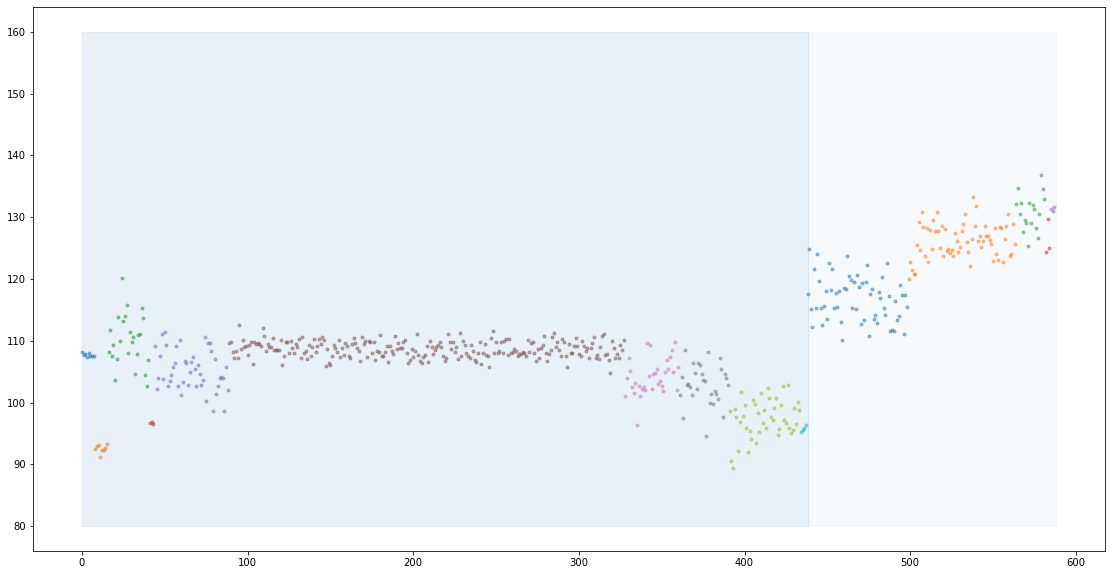

In [717]:
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [18,26]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in cdict[c]]
    
    for arr in vals:
        ax.scatter(np.r_[counter:counter+len(arr)], arr, marker = '.', alpha=0.5)
        counter+= len(arr)
    ax.add_patch(mpl.patches.Rectangle((c0,80), counter-c0, 80, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    cc+=1

In [732]:
with open('./debug_data/acdp_model.pickle', 'wb') as f:
    pickle.dump(a_cov_dp, f)

In [720]:
val_list = []
for c in [18,26]:
    vals = [a_cov_dp.segment_r_list[i] for i in cdict[c]]
    val_list.extend(vals)

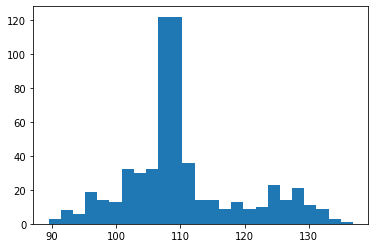

In [725]:
_ = plt.hist(np.hstack(val_list), bins=25)

testing V4 datapoints where datapoints are drawn from distribution of all dp draws (similar to V3)

In [187]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [188]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True)

In [189]:
a_cov_dp.run(1)

n unassigned: 1557
n unassigned: 1424
n unassigned: 1311
n unassigned: 1212
n unassigned: 1118
n unassigned: 1029
n unassigned: 958
n unassigned: 895
n unassigned: 822
n unassigned: 755
n unassigned: 692
n unassigned: 632
n unassigned: 584
n unassigned: 545
n unassigned: 495
n unassigned: 457
n unassigned: 424
n unassigned: 397
n unassigned: 364
n unassigned: 339
n unassigned: 306
n unassigned: 276
n unassigned: 255
n unassigned: 239
n unassigned: 216
n unassigned: 192
n unassigned: 177
n unassigned: 161
n unassigned: 83
n unassigned: 13
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0


([array([ 0,  0,  0, ..., 44, 44, 44])],
 SortedDict({0: 11560, 4: 32622, 10: 3071, 12: 52718, 40: 29768, 44: 2523, 53: 17271, 94: 6824, 310: 1789, 735: 4841}))

In [192]:
len(a_cov_dp.cluster_dict)

10

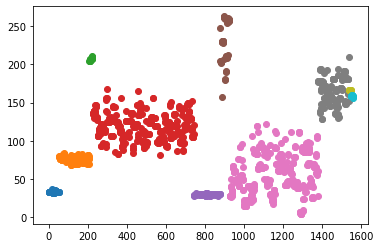

In [193]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

In [178]:
np.cumsum(np.array([10,15,20]))

array([10, 25, 45])

trying with "warm start"

In [198]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [210]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True)

In [211]:
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0


([array([ 20,  20,  20, ..., 772, 772, 772])],
 SortedDict({15: 3408, 20: 44315, 37: 5603, 237: 1978, 364: 47094, 570: 7200, 636: 19409, 648: 10014, 717: 22602, 772: 4233, 843: 3237, 2076: 23, 2321: 44, 4935: 61, 4940: 153, 4941: 130, 4942: 8, 4946: 58, 4947: 104, 4948: 53, 4950: 94, 4953: 30, 4954: 84, 4957: 45, 4958: 91, 4959: 27, 4960: 129, 4962: 48, 4963: 65, 4964: 18, 4965: 139, 4966: 11, 4967: 95}))

In [212]:
len(a_cov_dp.cluster_dict)

33

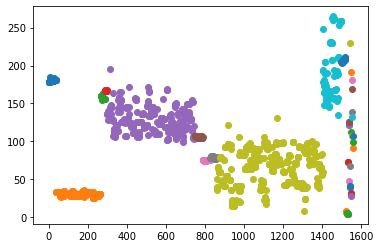

In [213]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

In [178]:
np.cumsum(np.array([10,15,20]))

array([10, 25, 45])

(array([  5.,   3.,  15.,  26., 176., 329., 452., 414., 155.,  17.]),
 array([-11.20799764,  -9.38457588,  -7.56115411,  -5.73773235,
         -3.91431059,  -2.09088883,  -0.26746707,   1.5559547 ,
          3.37937646,   5.20279822,   7.02621998]),
 <BarContainer object of 10 artists>)

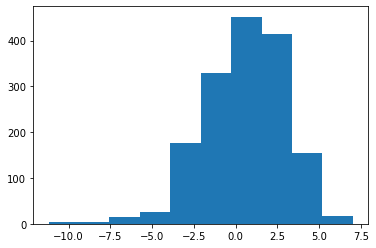

In [209]:
plt.hist(np.log(np.array([np.array(a_cov_dp.segment_r_list[i]).var() for i in range(a_cov_dp.num_segments)])))

<img src="exome_results/acdp_figure.png">